In [85]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

options(repr.plot.width = 13.0, repr.plot.height = 13.0)

[1] "playground-series-s4e4"

# **Import**

In [86]:
library(ggplot2)
library(dplyr)
library(psych)
library(ggcorrplot)
library(gridExtra)

# **1. Data Import & Structure**

In [87]:
train <- read.csv('/kaggle/input/playground-series-s4e4/train.csv')
test <- read.csv('/kaggle/input/playground-series-s4e4/test.csv')

In [88]:
str(train)

'data.frame':	90615 obs. of  10 variables:
 $ id            : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Sex           : chr  "F" "F" "I" "M" ...
 $ Length        : num  0.55 0.63 0.16 0.595 0.555 0.61 0.415 0.61 0.205 0.565 ...
 $ Diameter      : num  0.43 0.49 0.11 0.475 0.425 0.48 0.325 0.49 0.15 0.425 ...
 $ Height        : num  0.15 0.145 0.025 0.15 0.13 0.17 0.11 0.15 0.04 0.125 ...
 $ Whole.weight  : num  0.771 1.13 0.021 0.914 0.782 ...
 $ Whole.weight.1: num  0.3285 0.458 0.0055 0.3755 0.3695 ...
 $ Whole.weight.2: num  0.146 0.277 0.003 0.205 0.16 ...
 $ Shell.weight  : num  0.24 0.32 0.005 0.25 0.198 ...
 $ Rings         : int  11 11 6 10 9 10 9 9 4 8 ...


In [89]:
str(test)

'data.frame':	60411 obs. of  9 variables:
 $ id            : int  90615 90616 90617 90618 90619 90620 90621 90622 90623 90624 ...
 $ Sex           : chr  "M" "M" "M" "M" ...
 $ Length        : num  0.645 0.58 0.56 0.57 0.415 0.56 0.635 0.34 0.485 0.64 ...
 $ Diameter      : num  0.475 0.46 0.42 0.49 0.325 0.425 0.49 0.25 0.37 0.5 ...
 $ Height        : num  0.155 0.16 0.14 0.145 0.11 0.14 0.17 0.075 0.11 0.195 ...
 $ Whole.weight  : num  1.238 0.983 0.84 0.874 0.358 ...
 $ Whole.weight.1: num  0.619 0.478 0.352 0.352 0.158 ...
 $ Whole.weight.2: num  0.312 0.22 0.184 0.186 0.067 ...
 $ Shell.weight  : num  0.3 0.275 0.24 0.235 0.105 ...


In [90]:
describe(train)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
id,1,90615,4.530700e+04,2.615844e+04,45307.0000,4.530700e+04,3.358682e+04,0.0000,90614.0000,90614.0000,0.00000000,-1.2000397286,8.689841e+01
Sex*,2,90615,2.050014e+00,7.951737e-01,2.0000,2.062516e+00,1.482600e+00,1.0000,3.0000,2.0000,-0.08946413,-1.4134794602,2.641569e-03
Length,3,90615,5.170984e-01,1.182167e-01,0.5450,5.266569e-01,1.037820e-01,0.0750,0.8150,0.7400,-0.73199096,0.1332210726,3.927162e-04
Diameter,4,90615,4.016792e-01,9.802632e-02,0.4250,4.093193e-01,8.895600e-02,0.0550,0.6500,0.5950,-0.69521295,0.0005137883,3.256437e-04
Height,5,90615,1.354641e-01,3.800756e-02,0.1400,1.364955e-01,3.706500e-02,0.0000,1.1300,1.1300,0.30996480,13.4528789246,1.262612e-04
Whole.weight,6,90615,7.890350e-01,4.576707e-01,0.7995,7.645438e-01,4.773972e-01,0.0020,2.8255,2.8235,0.42930205,-0.1852537045,1.520383e-03
Whole.weight.1,7,90615,3.407781e-01,2.044285e-01,0.3300,3.280455e-01,2.127531e-01,0.0010,1.4880,1.4870,0.59195370,0.2838575776,6.791119e-04
Whole.weight.2,8,90615,1.694218e-01,1.009089e-01,0.1660,1.635374e-01,1.089711e-01,0.0005,0.7600,0.7595,0.47671756,-0.2038376627,3.352196e-04
Shell.weight,9,90615,2.258978e-01,1.302033e-01,0.2250,2.190946e-01,1.341753e-01,0.0015,1.0050,1.0035,0.47907663,0.0959091208,4.325358e-04


In [91]:
describe(test)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
id,1,60411,1.208200e+05,1.743930e+04,1.2082e+05,1.208200e+05,2.239171e+04,90615.0000,151025.0000,60410.0000,0.0000000,-1.200059592,7.095304e+01
Sex*,2,60411,2.056215e+00,7.928990e-01,2.0000e+00,2.070268e+00,1.482600e+00,1.0000,3.0000,2.0000,-0.1002756,-1.403165712,3.225967e-03
Length,3,60411,5.174282e-01,1.176087e-01,5.4500e-01,5.269811e-01,1.037820e-01,0.0750,0.8000,0.7250,-0.7345284,0.141573564,4.784995e-04
Diameter,4,60411,4.019613e-01,9.746969e-02,4.2500e-01,4.095716e-01,8.154300e-02,0.0550,0.6500,0.5950,-0.6962769,0.003865672,3.965625e-04
Height,5,60411,1.357511e-01,3.817476e-02,1.4000e-01,1.366716e-01,3.706500e-02,0.0000,1.0950,1.0950,0.5544786,17.691084563,1.553167e-04
Whole.weight,6,60411,7.900623e-01,4.575906e-01,8.0150e-01,7.654613e-01,4.773972e-01,0.0020,2.8255,2.8235,0.4356419,-0.165605883,1.861740e-03
Whole.weight.1,7,60411,3.412269e-01,2.042207e-01,3.2900e-01,3.285443e-01,2.127531e-01,0.0010,1.4880,1.4870,0.5931763,0.289939759,8.308866e-04
Whole.weight.2,8,60411,1.694193e-01,1.007205e-01,1.6600e-01,1.635447e-01,1.082298e-01,0.0005,0.6415,0.6410,0.4761052,-0.205057875,4.097884e-04
Shell.weight,9,60411,2.261247e-01,1.298265e-01,2.2500e-01,2.193835e-01,1.356579e-01,0.0015,1.0040,1.0025,0.4685004,0.042467618,5.282083e-04


**Check missing value**

In [92]:
colSums(is.na(train))

id            Sex         Length       Diameter         Height 
             0              0              0              0              0 
  Whole.weight Whole.weight.1 Whole.weight.2   Shell.weight          Rings 
             0              0              0              0              0

In [93]:
colSums(is.na(test))

id            Sex         Length       Diameter         Height 
             0              0              0              0              0 
  Whole.weight Whole.weight.1 Whole.weight.2   Shell.weight 
             0              0              0              0

**Duplicate check**

In [94]:
sum(duplicated(train))

[1] 0

In [95]:
sum(duplicated(test))

[1] 0

In [96]:
head(train)

,id,Sex,Length,Diameter,Height,Whole.weight,Whole.weight.1,Whole.weight.2,Shell.weight,Rings
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
2,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
3,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
4,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
5,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9
6,5,F,0.610,0.480,0.170,1.2010,0.5335,0.3135,0.3085,10


In [97]:
head(test)

,id,Sex,Length,Diameter,Height,Whole.weight,Whole.weight.1,Whole.weight.2,Shell.weight
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
2,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
3,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
4,90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
5,90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050
6,90620,M,0.560,0.425,0.140,0.8105,0.3525,0.1915,0.2150


In [98]:
summary(train)

       id            Sex                Length          Diameter     
 Min.   :    0   Length:90615       Min.   :0.0750   Min.   :0.0550  
 1st Qu.:22654   Class :character   1st Qu.:0.4450   1st Qu.:0.3450  
 Median :45307   Mode  :character   Median :0.5450   Median :0.4250  
 Mean   :45307                      Mean   :0.5171   Mean   :0.4017  
 3rd Qu.:67960                      3rd Qu.:0.6000   3rd Qu.:0.4700  
 Max.   :90614                      Max.   :0.8150   Max.   :0.6500  
     Height        Whole.weight    Whole.weight.1   Whole.weight.2  
 Min.   :0.0000   Min.   :0.0020   Min.   :0.0010   Min.   :0.0005  
 1st Qu.:0.1100   1st Qu.:0.4190   1st Qu.:0.1775   1st Qu.:0.0865  
 Median :0.1400   Median :0.7995   Median :0.3300   Median :0.1660  
 Mean   :0.1355   Mean   :0.7890   Mean   :0.3408   Mean   :0.1694  
 3rd Qu.:0.1600   3rd Qu.:1.0675   3rd Qu.:0.4630   3rd Qu.:0.2325  
 Max.   :1.1300   Max.   :2.8255   Max.   :1.4880   Max.   :0.7600  
  Shell.weight        Rings

------------

# **2. Data Visualization**

In [99]:
num_cols <- colnames(train[,3:10])

**Histogram**

In [100]:
p1 <- ggplot(train) + geom_histogram(aes(x=Length), bins = 20, col = 'white') + ggtitle('Length Hisgtogram') + theme_bw()
p2 <- ggplot(train) + geom_histogram(aes(x=Diameter), bins = 20, col = 'white') + ggtitle('Diameter Hisgtogram') + theme_bw()
p3 <- ggplot(train) + geom_histogram(aes(x=Height), bins = 20, col = 'white') + ggtitle('Height Hisgtogram') + theme_bw()
p4 <- ggplot(train) + geom_histogram(aes(x=Whole.weight), bins = 20, col = 'white') + ggtitle('Whole.weight Hisgtogram') + theme_bw()
p5 <- ggplot(train) + geom_histogram(aes(x=Whole.weight.1), bins = 20, col = 'white') + ggtitle('Whole.weight.1 Hisgtogram') + theme_bw()
p6 <- ggplot(train) + geom_histogram(aes(x=Whole.weight.2), bins = 20, col = 'white') + ggtitle('Whole.weight.2 Hisgtogram') + theme_bw()
p7 <- ggplot(train) + geom_histogram(aes(x=Shell.weight), bins = 20, col = 'white') + ggtitle('Shell.weight Hisgtogram') + theme_bw()
p8 <- ggplot(train) + geom_histogram(aes(x=Rings), bins = 20, col = 'white') + ggtitle('Rings Hisgtogram') + theme_bw()

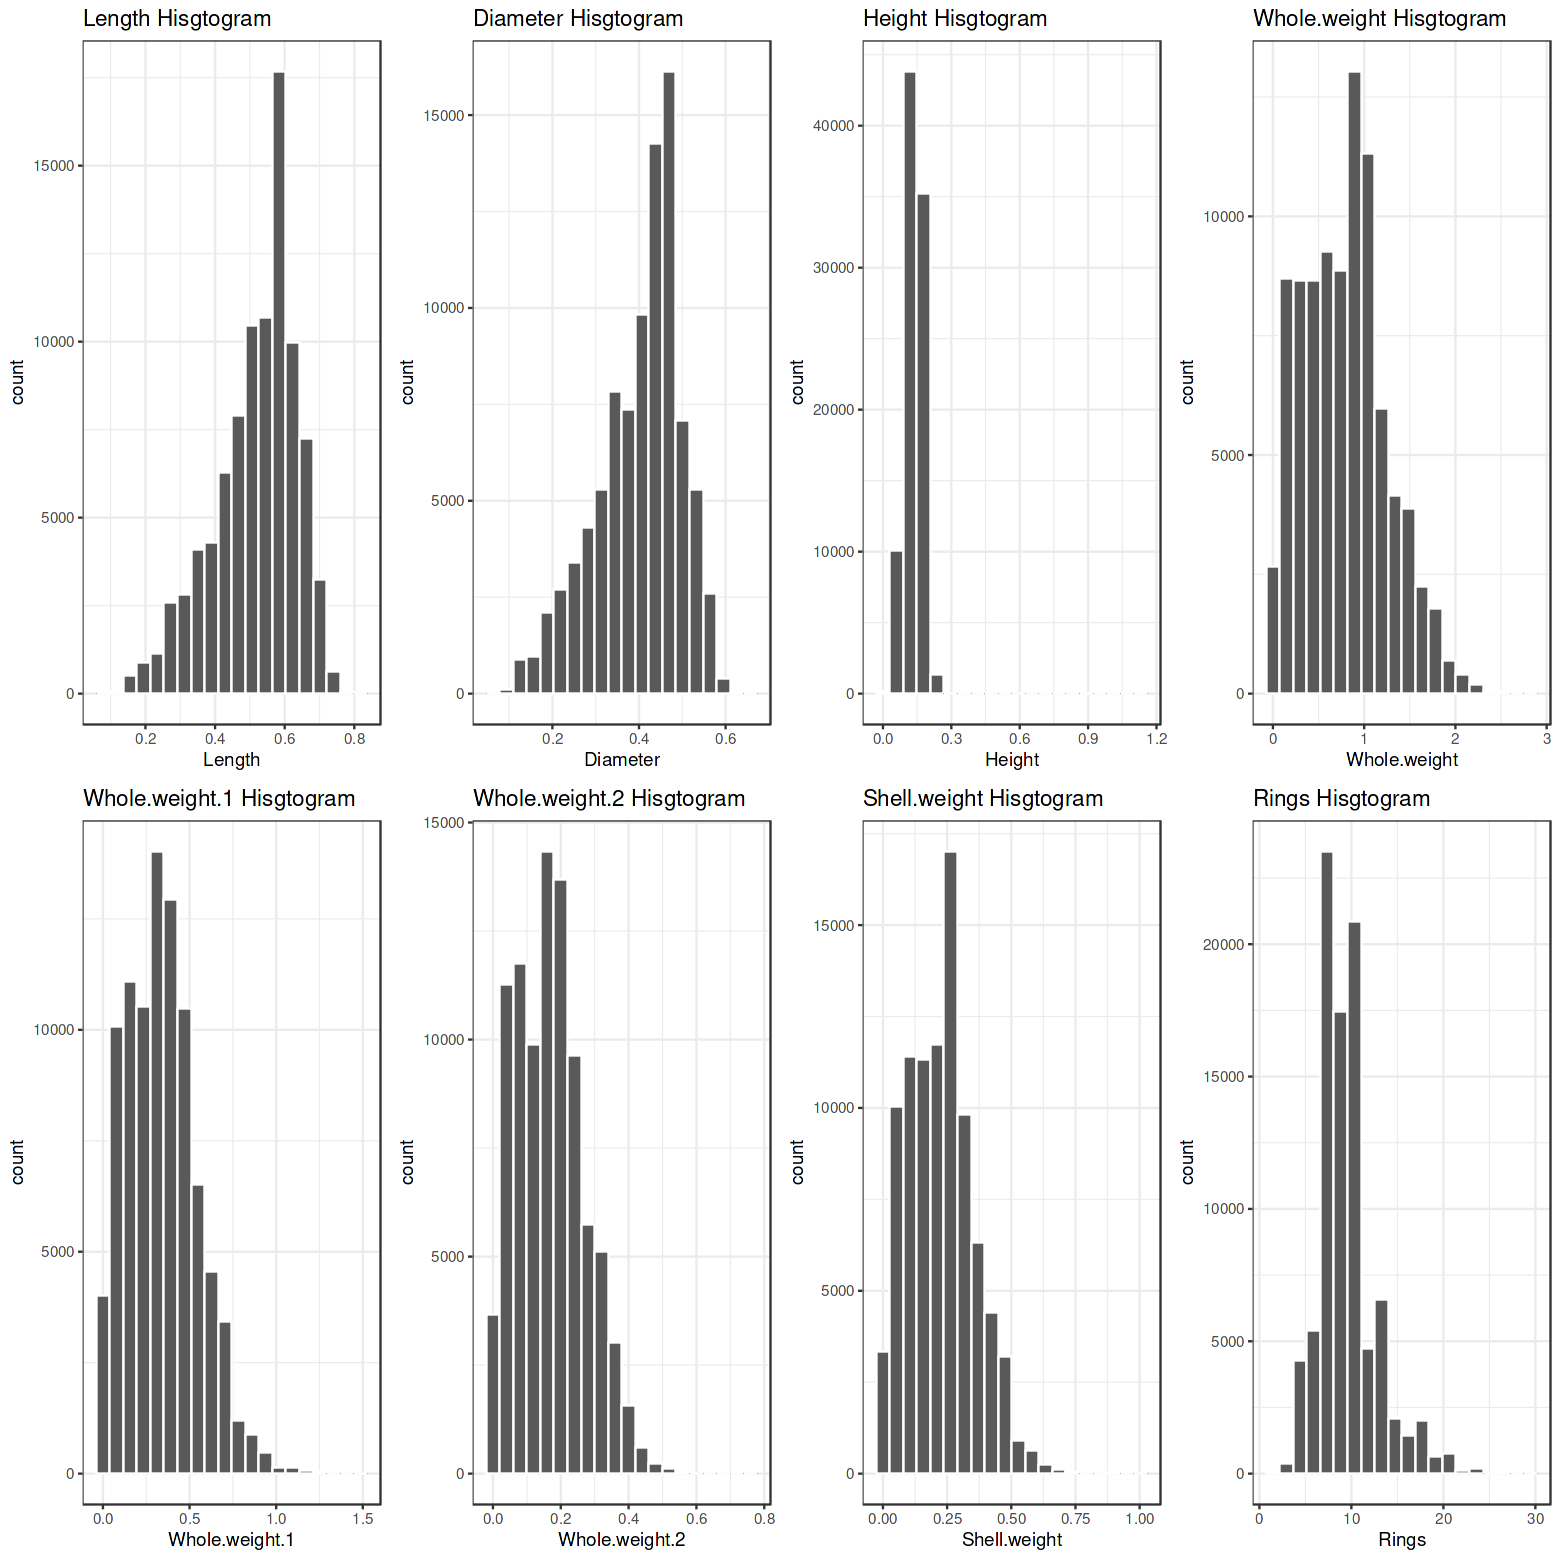

In [101]:
grid.arrange(p1,p2,p3,p4,p5,p6,p7,p8 ,ncol = 4)

------------

**Boxplot**

In [102]:
p1 <- ggplot(train) + geom_boxplot(aes(x=Length), color = 'red') + ggtitle('Length boxplot') + theme_bw()
p2 <- ggplot(train) + geom_boxplot(aes(x=Diameter), color = 'orange') + ggtitle('Diameter boxplot') + theme_bw()
p3 <- ggplot(train) + geom_boxplot(aes(x=Height), color = 'pink') + ggtitle('Height boxplot') + theme_bw()
p4 <- ggplot(train) + geom_boxplot(aes(x=Whole.weight), color = 'green') + ggtitle('Whole.weight boxplot') + theme_bw()
p5 <- ggplot(train) + geom_boxplot(aes(x=Whole.weight.1), color = 'blue') + ggtitle('Whole.weight.1 boxplot') + theme_bw()
p6 <- ggplot(train) + geom_boxplot(aes(x=Whole.weight.2), color = 'skyblue') + ggtitle('Whole.weight.2 boxplot') + theme_bw()
p7 <- ggplot(train) + geom_boxplot(aes(x=Shell.weight), color = 'violet') + ggtitle('Shell.weight boxplot') + theme_bw()
p8 <- ggplot(train) + geom_boxplot(aes(x=Rings), color = 'yellowgreen') + ggtitle('Rings boxplot') + theme_bw()

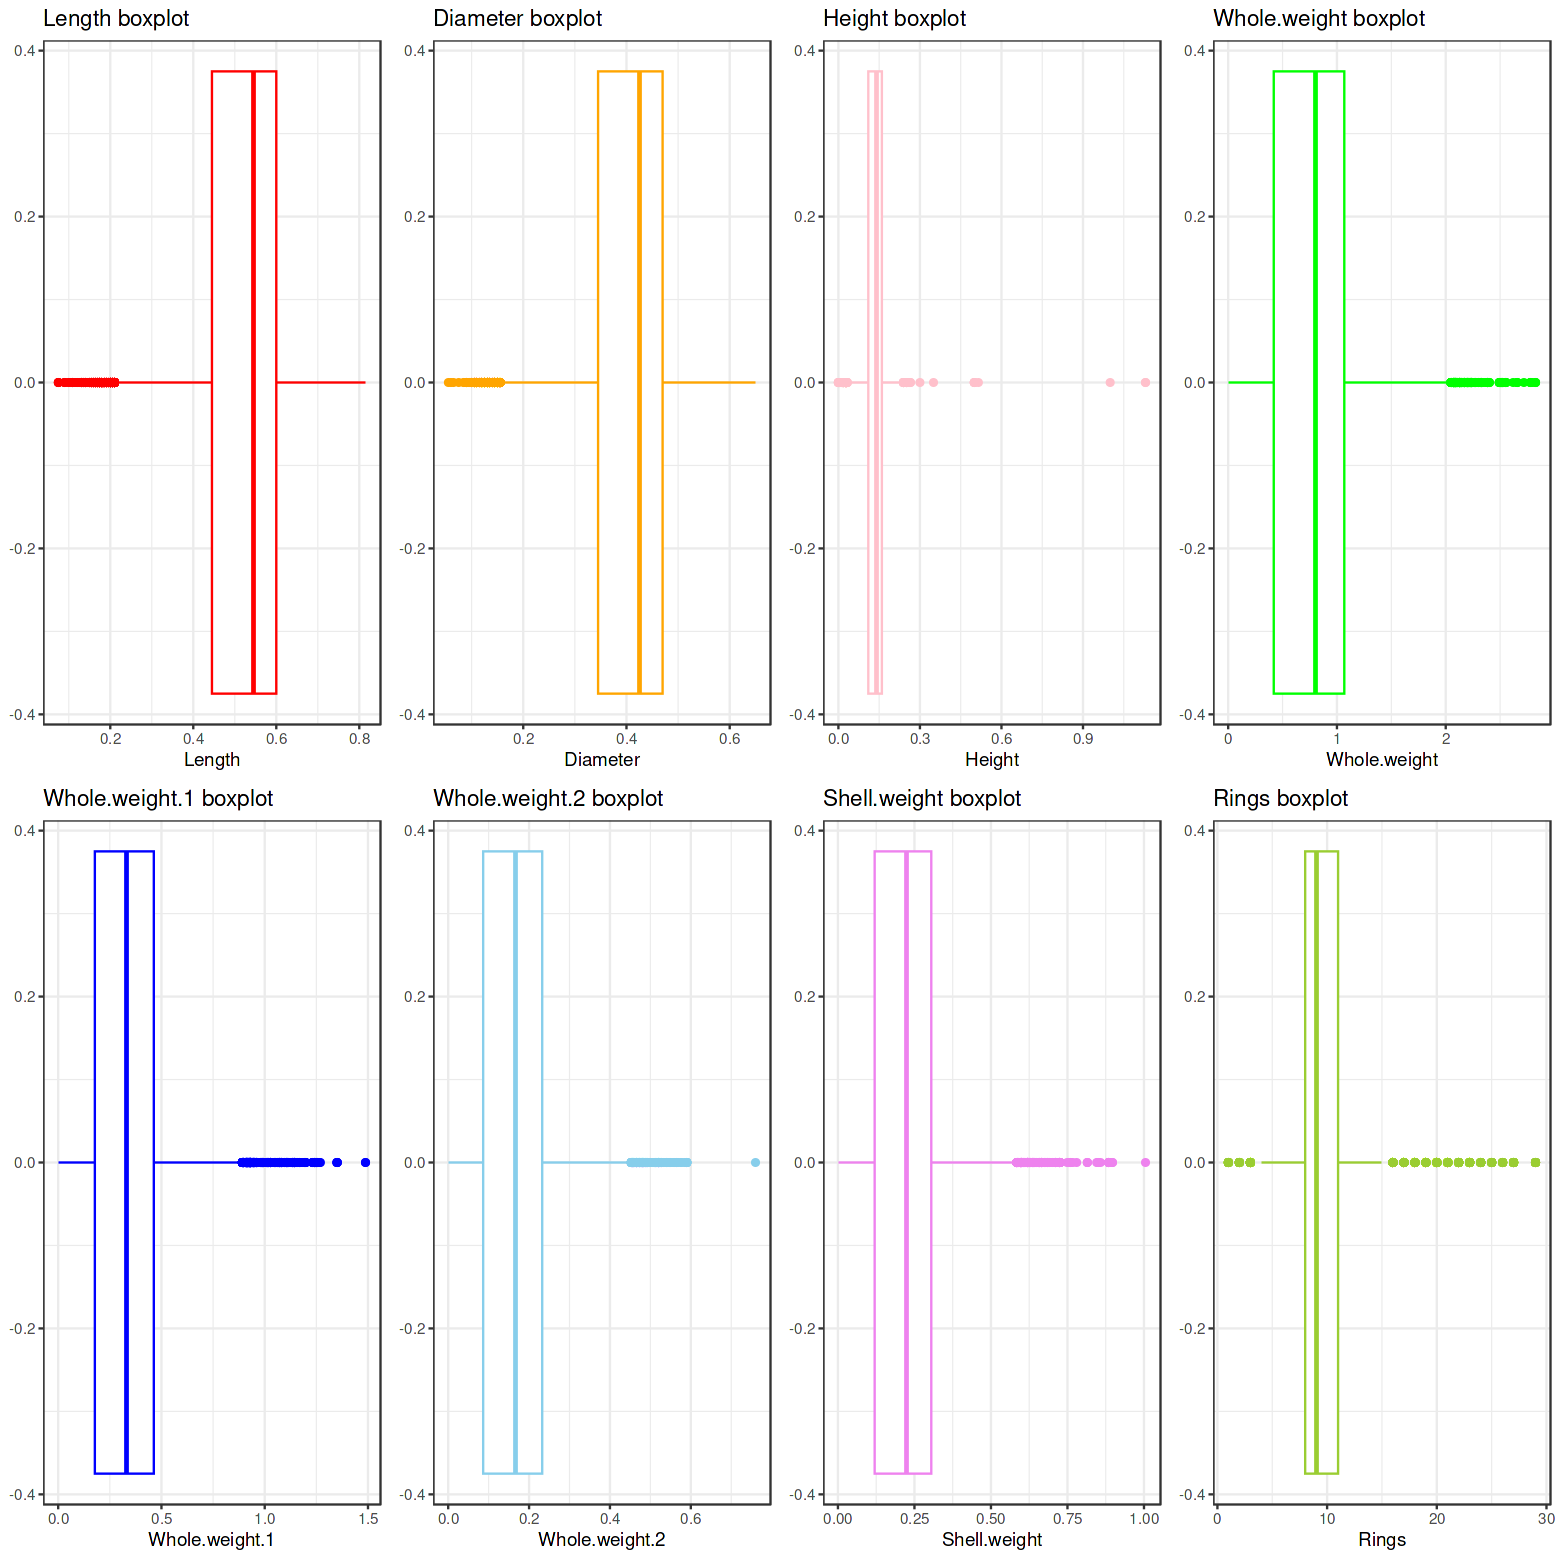

In [103]:
grid.arrange(p1,p2,p3,p4,p5,p6,p7,p8 ,ncol = 4)

---------

**Distribution of Abalone Sex**

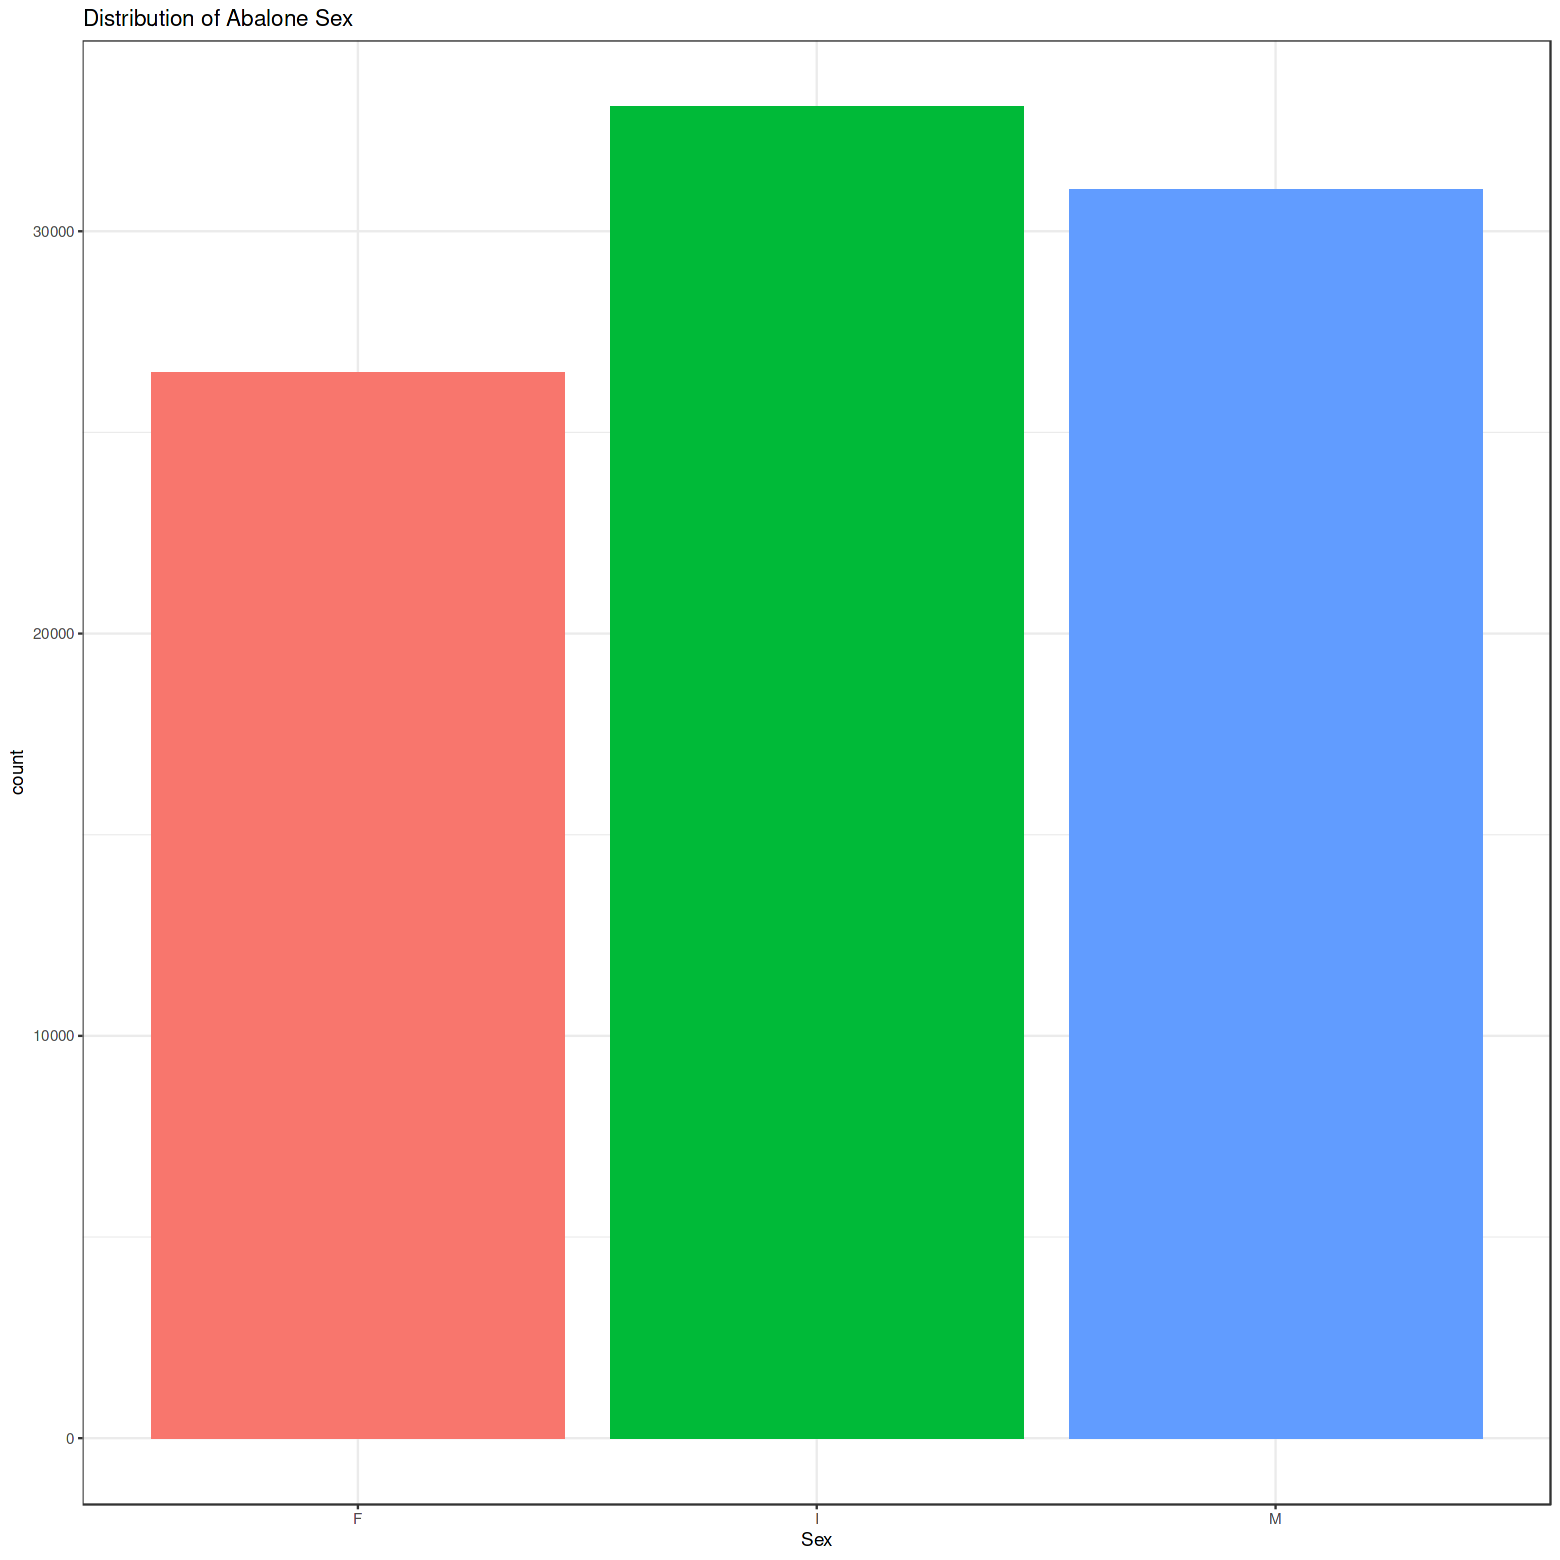

In [104]:
ggplot(train) + geom_bar(aes(x=Sex, fill = Sex)) + ggtitle('Sex Count') + ggtitle('Distribution of Abalone Sex') +theme_bw() + theme(legend.position = 'none')

--------

**Correlation**

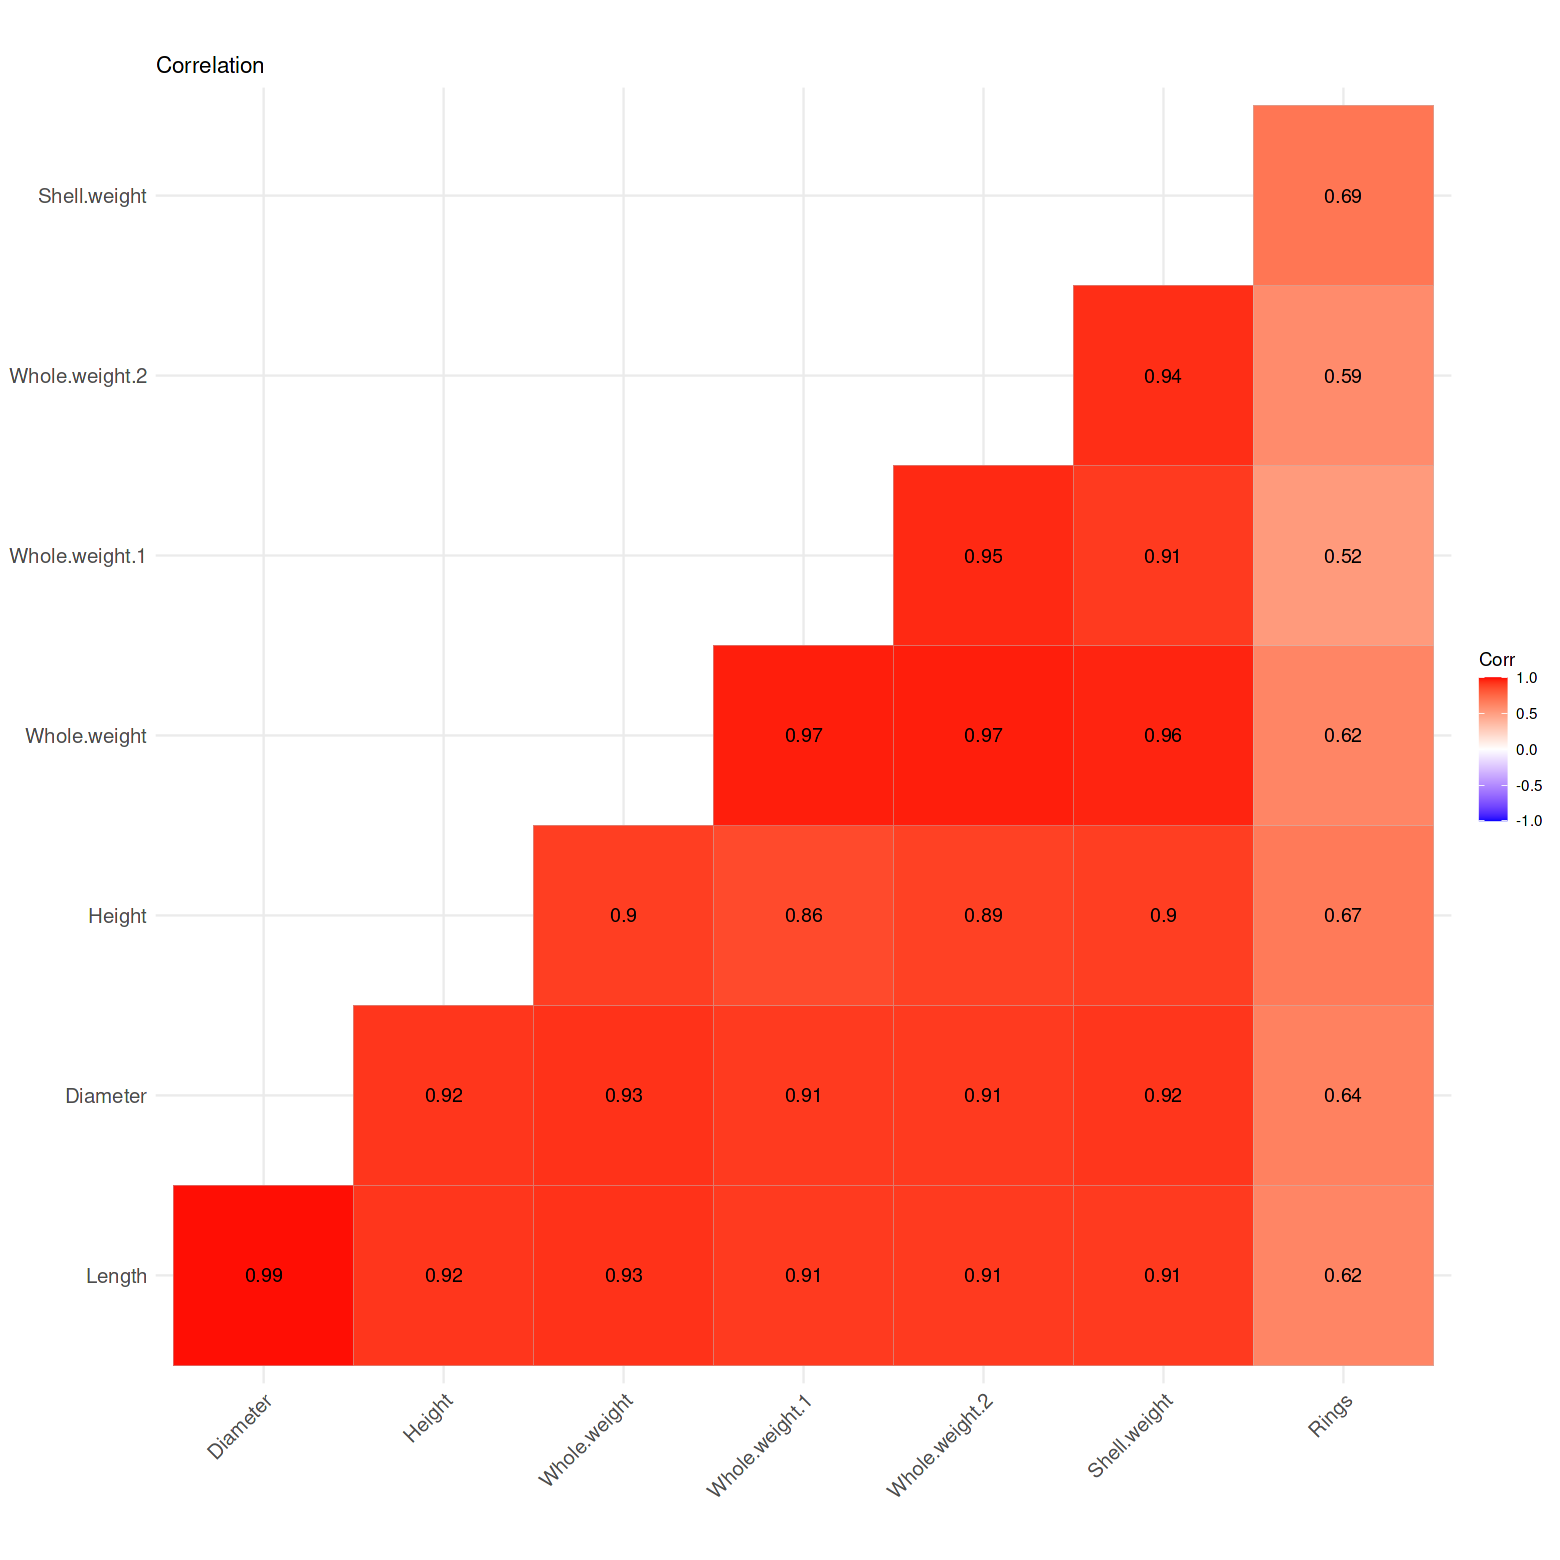

In [105]:
ggcorrplot(cor(train[,num_cols]) , type = "lower", lab=T, title = 'Correlation')

----------

# **3. Modeling**

In [106]:
library(Metrics)
library(caret)

In [107]:
train <- train[,-1]
test <- test[,-1]

**Pre-processing of data before analysis**

In [108]:
train$Sex <- ifelse(train$Sex == 'M',1 ,
                   ifelse(train$Sex == 'F',2 , 
                         ifelse(train$Sex == 'I',0,4)))


test$Sex <- ifelse(test$Sex == 'M',1 ,
                   ifelse(test$Sex == 'F',2 , 
                         ifelse(test$Sex == 'I',0,4)))

In [109]:
for(i in range(2,9)){
    Q1 = quantile(train[,i],c(0.25),na.rm = T)
    Q3 = quantile(train[,i],c(0.75),na.rm = T)
    mean = mean(train[,i],na.rm=T)
    
    lowwer = Q1 - 1.5 * (Q3 - Q1)
    upper = Q1 + 1.5 * (Q3 - Q1)
    
    train[,i] <- ifelse((train[,i] < lowwer) | (train[,i] > upper) , mean, train[,i])
}

In [110]:
for(i in range(2,8)){
    Q1 = quantile(test[,i],c(0.25),na.rm = T)
    Q3 = quantile(test[,i],c(0.75),na.rm = T)
    mean = median(test[,i],na.rm=T)
    
    lowwer = Q1 - 1.5 * (Q3 - Q1)
    upper = Q1 + 1.5 * (Q3 - Q1)
    
    test[,i] <- ifelse((test[,i] < lowwer) | (test[,i] > upper) , mean, test[,i])
}

**Linear Regression**

In [111]:
LR <- lm(Rings ~ ., train)

In [112]:
summary(LR)


Call:
lm(formula = Rings ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.2879 -0.7446 -0.1433  0.5869  5.5623 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     2.83957    0.02909  97.606  < 2e-16 ***
Sex             0.26400    0.00571  46.235  < 2e-16 ***
Length          1.23432    0.07040  17.533  < 2e-16 ***
Diameter       11.37922    0.13632  83.475  < 2e-16 ***
Height          8.33433    0.26242  31.760  < 2e-16 ***
Whole.weight   -0.70213    0.06533 -10.747  < 2e-16 ***
Whole.weight.1 -1.72993    0.08102 -21.353  < 2e-16 ***
Whole.weight.2  0.90412    0.15930   5.676 1.39e-08 ***
Shell.weight    1.86478    0.11768  15.846  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.08 on 90606 degrees of freedom
Multiple R-squared:  0.6139,	Adjusted R-squared:  0.6139 
F-statistic: 1.801e+04 on 8 and 90606 DF,  p-value: < 2.2e-16


In [113]:
anova(LR)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Sex,1,82809.49800,82809.497996,71049.7164,0.000000e+00
Length,1,56496.70994,56496.709938,48473.6089,0.000000e+00
Diameter,1,24502.72171,24502.721709,21023.0888,0.000000e+00
Height,1,1134.09234,1134.092337,973.0398,1.751221e-212
Whole.weight,1,1679.23144,1679.231442,1440.7637,8.497489e-313
Whole.weight.1,1,982.81159,982.811588,843.2425,1.511826e-184
Whole.weight.2,1,28.29474,28.294737,24.2766,8.359351e-07
Shell.weight,1,292.64576,292.645762,251.0871,1.792450e-56
Residuals,90606,105602.63656,1.165515,NA,NA


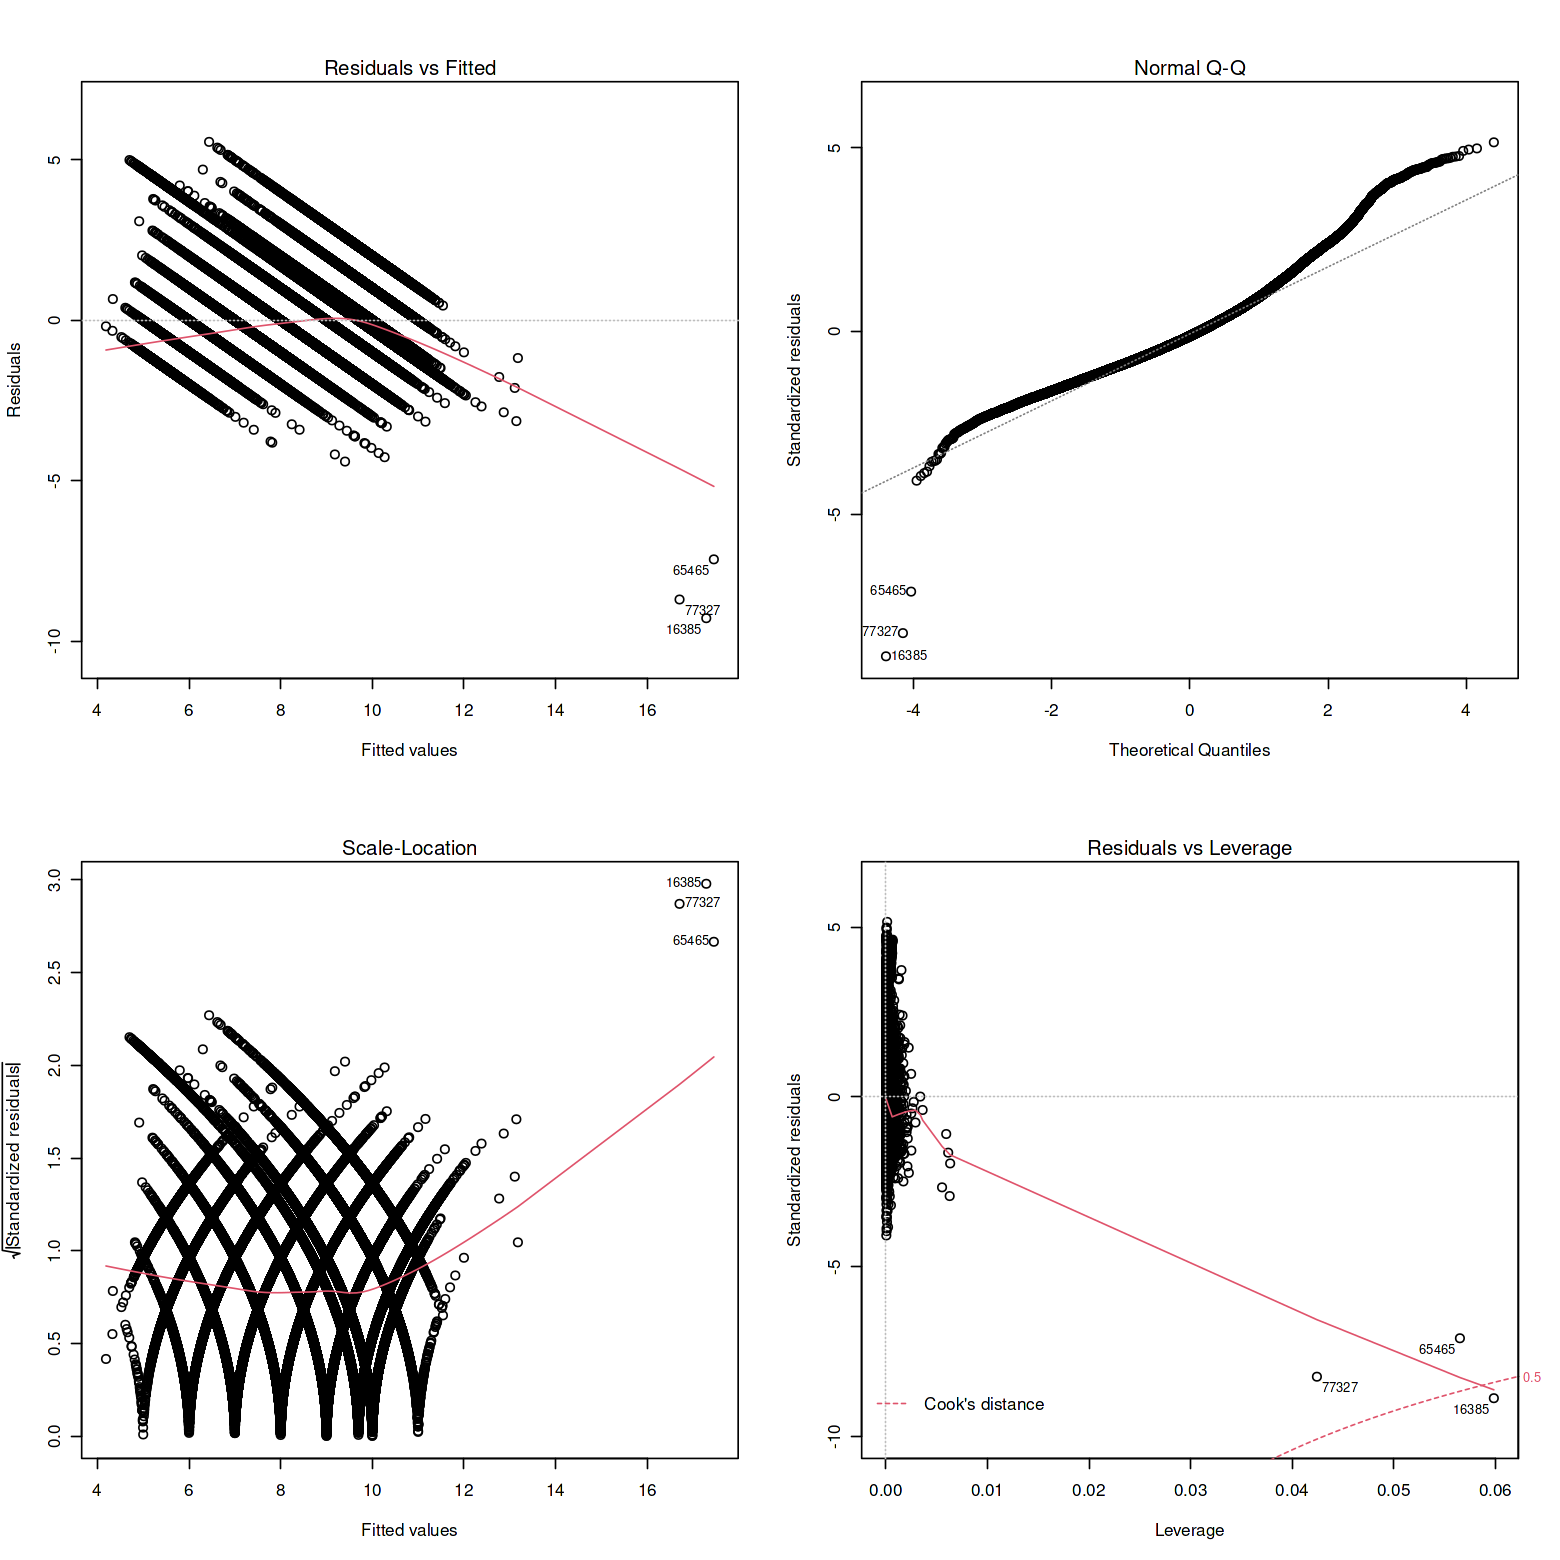

In [114]:
par(mfrow=c(2,2))
plot(LR)

**Remove extreme values**

In [115]:
train <- train[-c(16385,65465,77327),]

In [116]:
LR <- lm(Rings ~ ., train)

In [117]:
pred <- predict(LR,train)

In [118]:
cat('MSE:' ,mse(train$Rings,pred),'\n')
cat('MAE:' ,mae(train$Rings,pred),'\n')
cat('RMSE:' ,rmse(train$Rings,pred),'\n')
cat('R2:', R2(train$Rings,pred))

MSE: 1.16259 
MAE: 0.8333164 
RMSE: 1.078234 
R2: 0.6148643

In [119]:
pred <- predict(LR,test)

In [120]:
pred <- round(pred,0)

In [121]:
head(pred)

1  2  3  4  5  6 
 9 10  9 10  8  9

-----------

In [122]:
sample <- read.csv('/kaggle/input/playground-series-s4e4/test.csv')

In [123]:
sub <- as.data.frame(sample['id'])

In [124]:
sub$Rings <- pred

In [125]:
head(sub)

,id,Rings
,<int>,<dbl>
1,90615,9
2,90616,10
3,90617,9
4,90618,10
5,90619,8
6,90620,9


In [126]:
write.csv(sub,'submission.csv')

---------

**Please leave your advice in the comments. Thank you**